In [1]:
import numpy as np
import matplotlib.pyplot as plt
import MCMC_DZ.MCMC.Statistic_tools as Sts
import MCMC_DZ.MCMC.Visualization_tools as Vts
from MCMC_DZ.MCMC.MetropolisHastingMCMC.MHMC import MHMC
import MCMC_DZ.MCMC.MetropolisHastingMCMC.ProposalDistributions as PDs
from MCMC_DZ.BayesianInference.Likelihood_functions import Sinewave
import CrossInTray1

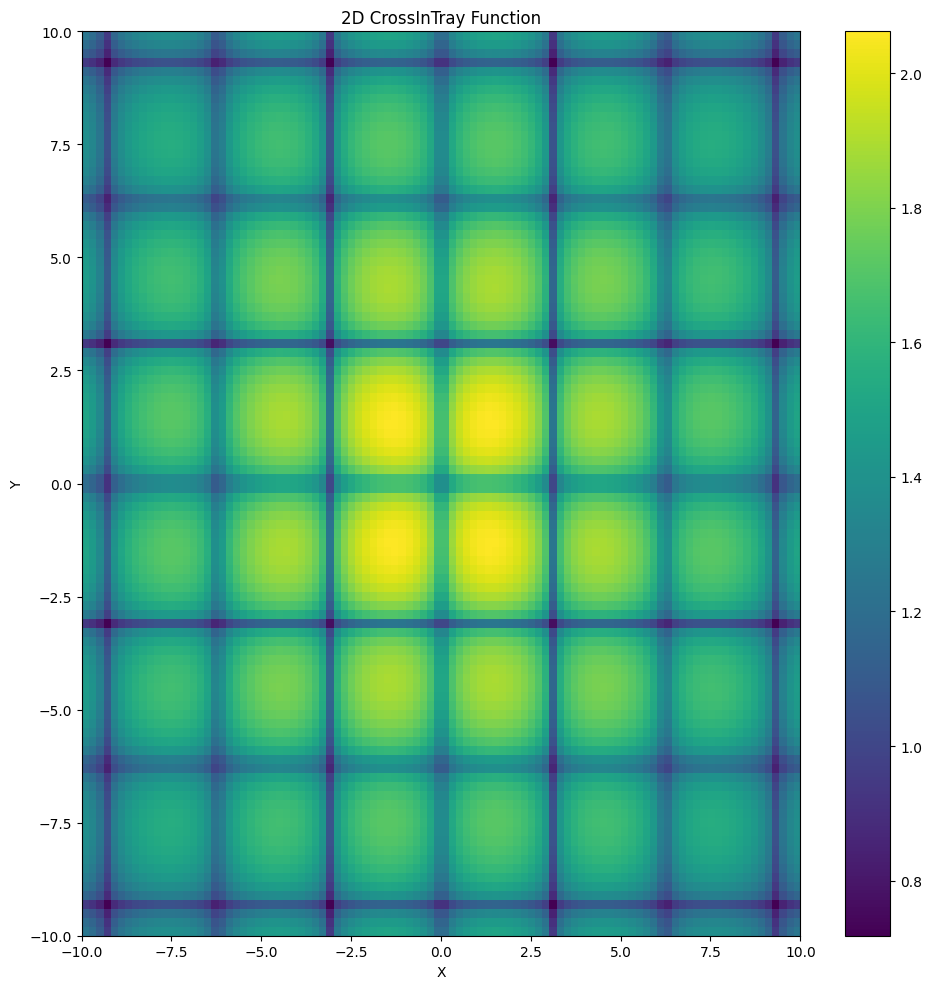

In [2]:
CIT = CrossInTray1.CrossInTray_function(0, 0.0001, 0.1, [(-10, 10), (-10, 10)])
Vts.Target_Distribution_Visualization(X_range=[-10, 10], Y_range=[-10, 10], Tar_Dis=CIT.f, Func_name="2D CrossInTray Function", alpha=1)

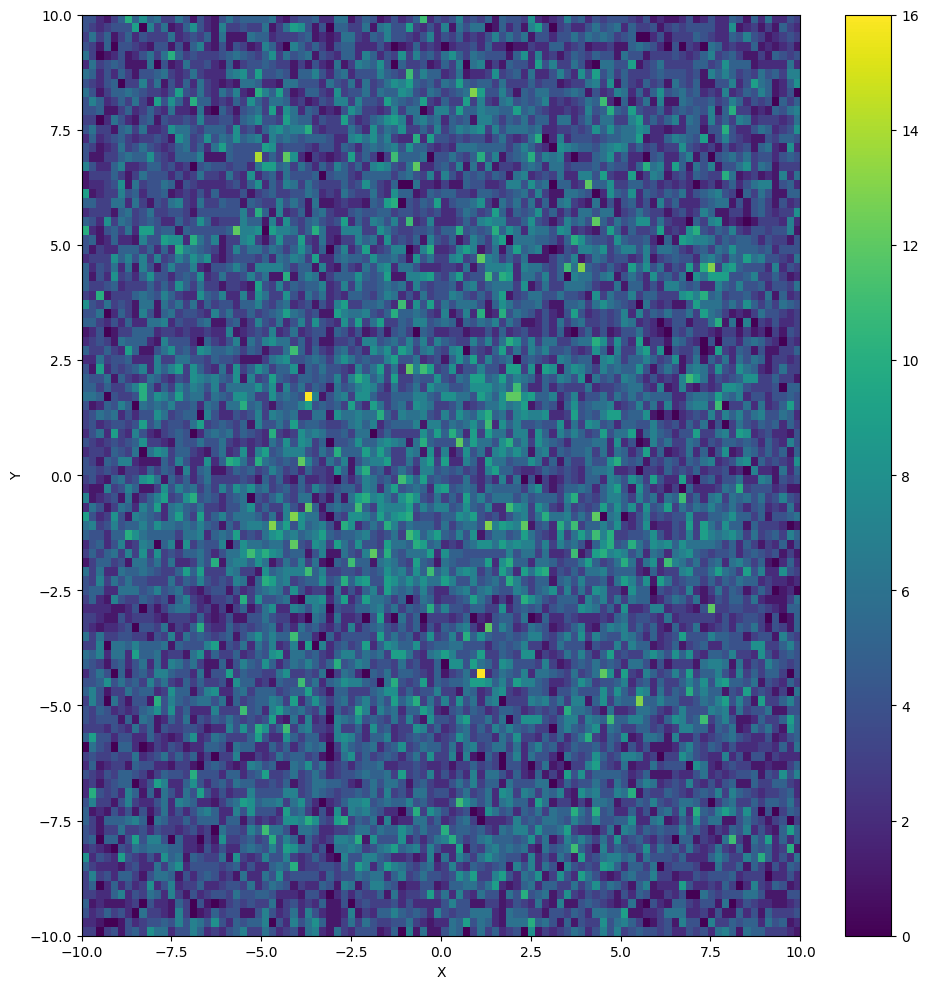

In [3]:
Data_range = np.array([[-10, 10], [-10, 10]])
CITFD_P = Sts.FakeDataGen2D_Poisson(CIT.f, [[-10, 10], [-10, 10]], 100, scaler=80)
Vts.PlotHeatmap(CITFD_P.x ,CITFD_P.y, CITFD_P.FakeData.reshape(CITFD_P.x.shape), xlabel="X", ylabel="Y", zlabel="F(X,Y)")

In [5]:
CIT_l =  CrossInTray1.CrossInTray_likeli(CITFD_P, 0, Data_range)

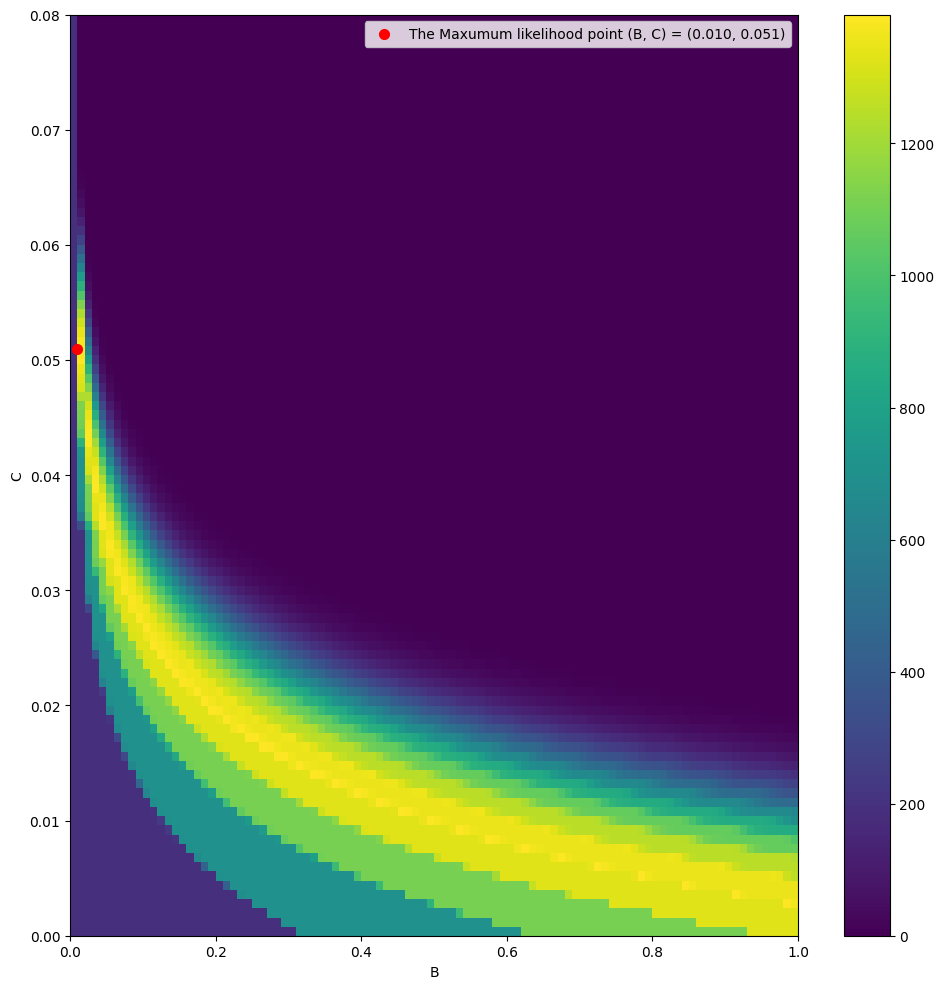

In [26]:
Bs = np.linspace(0, 1.0, 100)
Cs = np.linspace(0, 0.08, 100)
Bs, Cs = np.meshgrid(Bs, Cs)

Ls = []
for params in zip(Bs.flatten(), Cs.flatten()):
    Ls.append(CIT_l.l(params))

Ls = np.asarray(Ls).reshape(Bs.shape)
Vts.PlotHeatmap(Bs, Cs, Ls, xlabel="B", ylabel="C", zlabel="l(A, B)", Plot_Max=True)

In [24]:
import time
start = time.time()

steps = 10000
Prop_G = PDs.GaussianProposalDistribution(sd=0.01, Dim=2)
Prop_H = PDs.HamiltonianProposalFunction(rho=CIT_l.l, epsilon=0.009, L=5)
MHMC_CIT = MHMC(rho=CIT_l.l, log_likelihood=False)
Res_G_CIT = MHMC_CIT.generate(
    theta0=[0 for _ in range(2)], 
    qProb=Prop_G.qProb,
    qSamp=Prop_G.qSample,
    steps=steps,
    OutputRunTime=100,
    MaxTime=60
    )

end = time.time()
print(end - start)

27.922290086746216


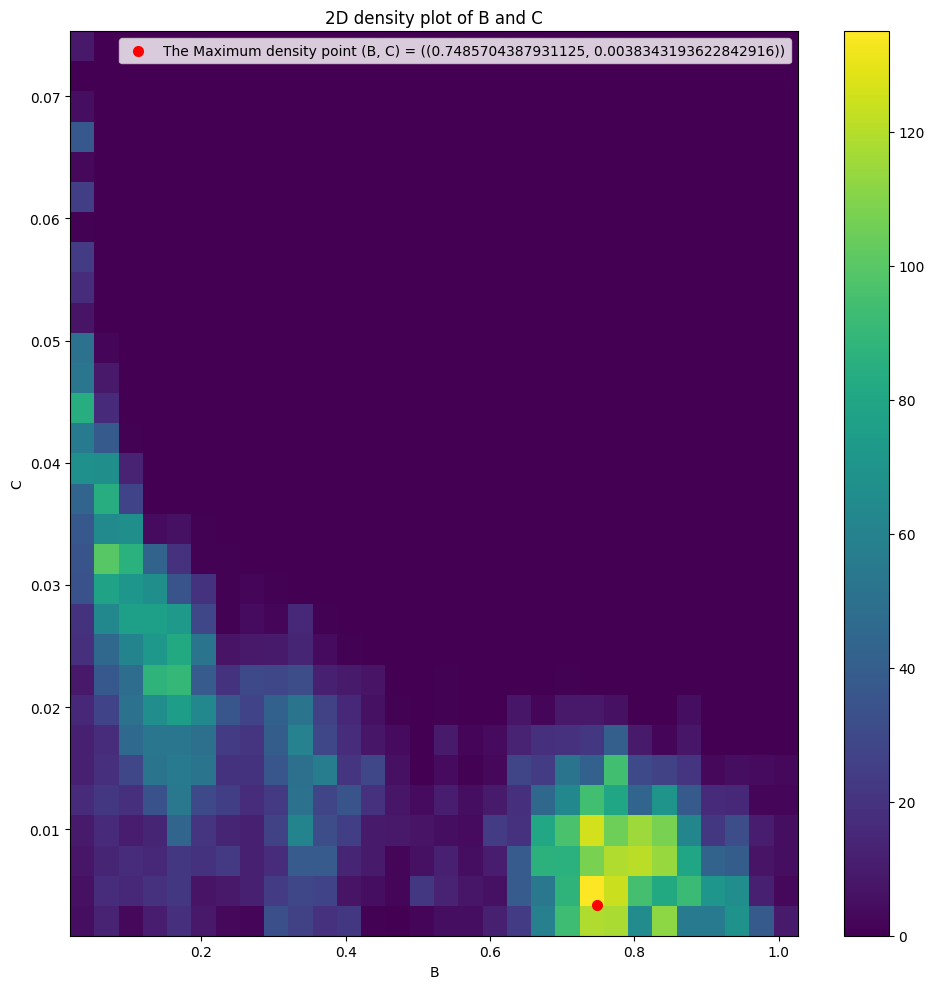

In [25]:
Vts.density_plot(
    Res_G_CIT["Thetas"], 
    bins=30,
    burn_in=100,
    credible_region=0,
    x_name="B",
    y_name="C",
    alpha=1
)

/Users/firework/MResMCMC2023/MCMC_DZ/MCMC/Visualization_tools.py:232: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


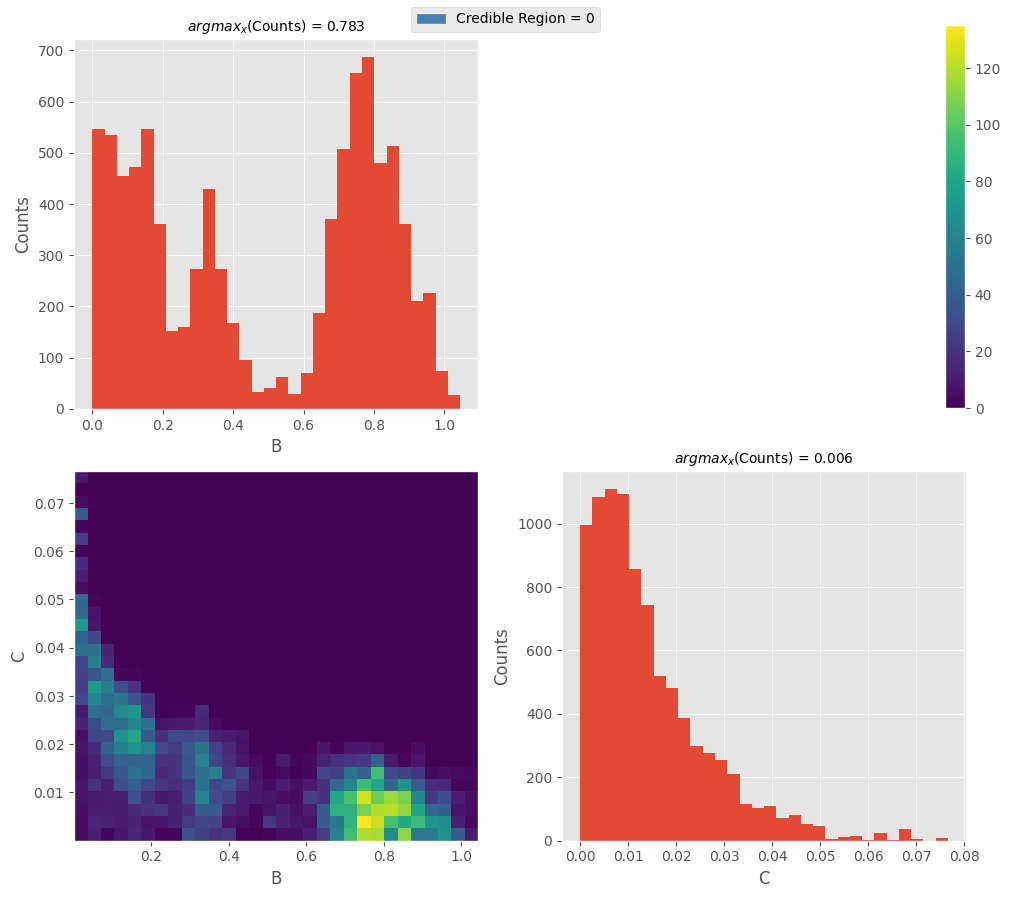

In [27]:
_ = Vts.density_plots(
    Res_G_CIT["Thetas"], 
    bins=30,
    burn_in=1000,
    plot_axis=[0, 1],
    axis_name=["B", "C"]
)

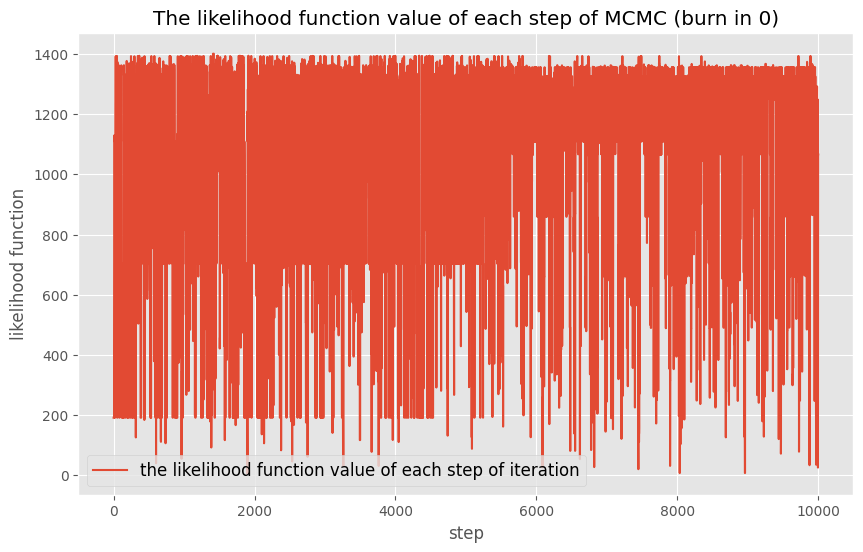

In [28]:
Vts.targetDis_step_plot(Thetas=Res_G_CIT["Thetas"], rho=CIT_l.l, target_type="likelihood function", burn_in=0, figsize=(10,6))

In [41]:
Res_G_CIT["Thetas"].shape

(19774, 2)

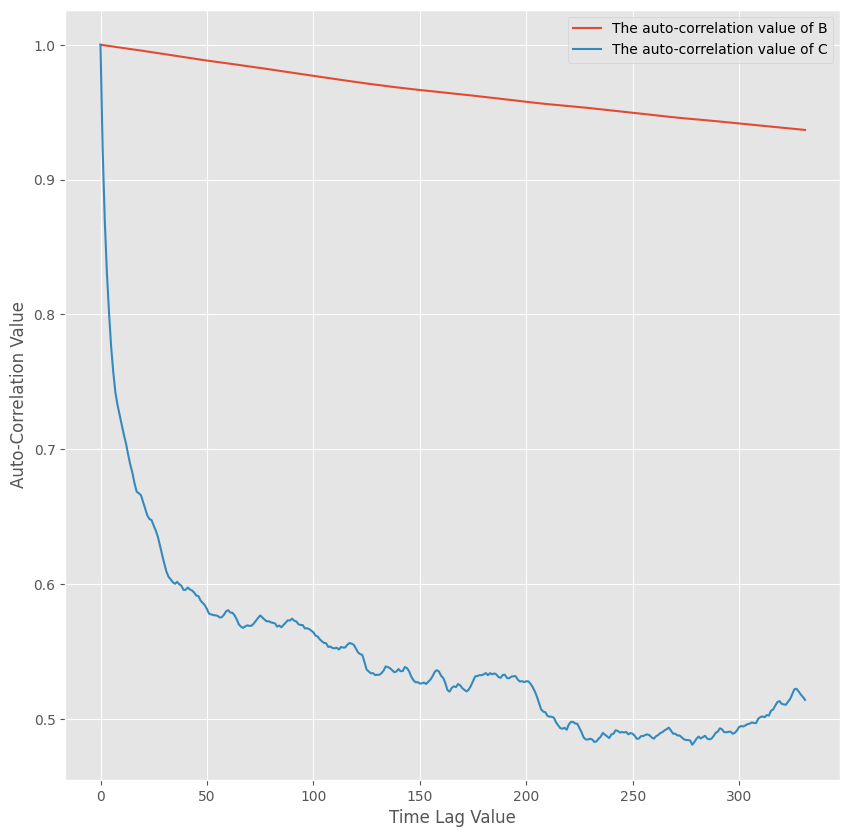

In [29]:
Vts.auto_corr_plot(Thetas=Res_G_CIT["Thetas"], plot_nth_theta = [0,1], theta_index = ['B','C'], max_time_lag=None, data_range=[], plot_together=True, figsize=(10, 10))